<a href="https://colab.research.google.com/github/jahnavi0105/100_days_of_Leetcode/blob/main/Copy_of_Mini_Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
#Loading data
from google.colab import files
dataset = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (2).csv


In [ ]:
from google.colab import files
dataset1 = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [ ]:
#Reading data
df=pd.read_csv('Google_Stock_Price_Train.csv')
df1=pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
#Feature extraction

df.head()
df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
pd.merge(df.head(),df1.head(),on=["Date","Open"],how="inner")

,Date,Open,High_x,Low_x,Close_x,Volume_x,High_y,Low_y,Close_y,Volume_y


In [ ]:
df.shape

(1258, 6)

In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
print(iqr)
print( df < (q1-1.5*iqr)) or (df > (q3+1.5*iqr))

Open    250.8075
High    255.8225
Low     243.0350
dtype: float64
      Close   Date   High    Low   Open  Volume
0     False  False  False  False  False   False
1     False  False  False  False  False   False
2     False  False  False  False  False   False
3     False  False  False  False  False   False
4     False  False  False  False  False   False
...     ...    ...    ...    ...    ...     ...
1253  False  False  False  False  False   False
1254  False  False  False  False  False   False
1255  False  False  False  False  False   False
1256  False  False  False  False  False   False
1257  False  False  False  False  False   False

[1258 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,Close,Date,High,Low,Open,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1253,False,False,False,False,False,False
1254,False,False,False,False,False,False
1255,False,False,False,False,False,False
1256,False,False,False,False,False,False


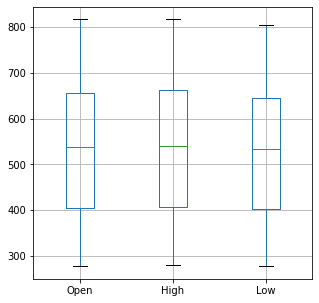

In [ ]:
boxplot = df.boxplot(figsize = (5,5))

In [ ]:

df = df['Open'].values
df = df.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
#Normalizing the Dataset.
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
#Creating X_train and y_train Data Structures.
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

First, we initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer with three-dimensional input and input_shape to shape our dataset.

Making the dropout fraction 0.2 drops 20% of the layers. Finally, we added a dense layer with a value of 1 because we want to output one value.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

We used loss='mean_squared_error' because it is a regression problem, and the adam optimizer to update network weights iteratively based on training data.

In [ ]:
# save our model and start the training:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')


#Every epoch refers to one cycle through the full training dataset, 
#and batch size refers to the number of training examples utilized in one iteration.

Epoch 1/50
30/30 [==============================] - 12s 166ms/step - loss: 0.0289
Epoch 2/50
30/30 [==============================] - 5s 164ms/step - loss: 0.0043
Epoch 3/50
30/30 [==============================] - 5s 163ms/step - loss: 0.0037
Epoch 4/50
30/30 [==============================] - 5s 162ms/step - loss: 0.0038
Epoch 5/50
30/30 [==============================] - 5s 162ms/step - loss: 0.0039
Epoch 6/50
30/30 [==============================] - 5s 161ms/step - loss: 0.0036
Epoch 7/50
30/30 [==============================] - 5s 163ms/step - loss: 0.0032
Epoch 8/50
30/30 [==============================] - 6s 198ms/step - loss: 0.0035
Epoch 9/50
30/30 [==============================] - 5s 164ms/step - loss: 0.0030
Epoch 10/50
30/30 [==============================] - 5s 162ms/step - loss: 0.0030
Epoch 11/50
30/30 [==============================] - 5s 162ms/step - loss: 0.0031
Epoch 12/50
30/30 [==============================] - 5s 163ms/step - loss: 0.0028
Epoch 13/50
30/30 [=====

In [ ]:
#load our model
model = load_model('stock_prediction.h5')

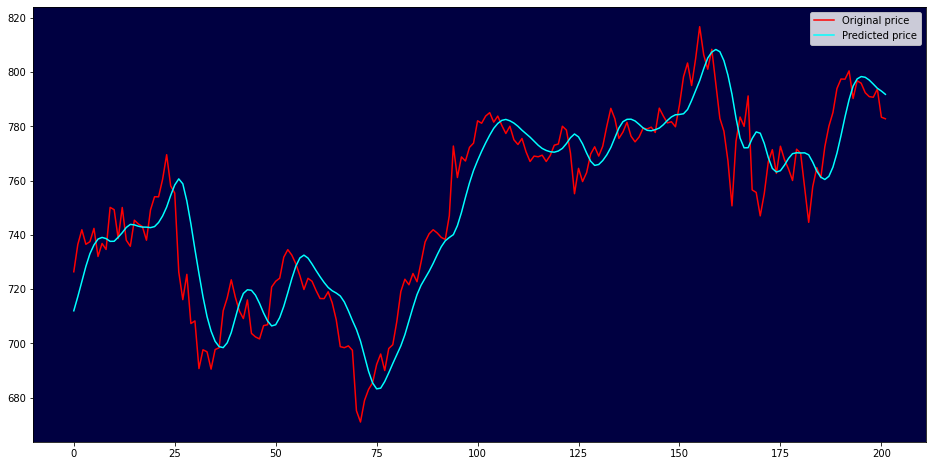

In [ ]:
#Results visualization
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()


#red -original price
#blue-predicted price